In [124]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

df = pd.read_csv('house_dataset.csv')
df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.50,acre,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0


In [92]:

X = df.drop(columns='price')
y = df['price']


# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X)

# Create an instance of the SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_imputed = imputer.fit_transform(X)



In [111]:
# split the dataset into two i.e training & testing sets
X_train_imputed, X_test_imputed, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)



In [112]:
# Create an instance of the DecisionTreeClassifier
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train_imputed, y_train)

DecisionTreeClassifier()

In [114]:
# Make predictions on the test set
y_pred = model.predict(X_test_imputed)
print("Predictions on the test set:", y_pred)

Predictions on the test set: [1033000. 1439000. 1750000.  625000.  970000.  525000.  630000. 2000000.
  928000. 1000000.  519950.  750000.  899950.  550000. 1106000.  765000.
 1125000.  305000.  933500. 1180000.  615000. 1650000.  769950.  468000.
  725000.  697000. 1450000.  399950.  865000.  500000. 1116000. 1400000.
  516000.  764000.  965000. 1000000.  575000. 1450000.  489000.  751000.
  499800.  360000.  425000.  650000. 2250000.  820000.  612500.  377500.
  275000.  750000.  445000.  479425. 1500000.  695000.  950000.  835000.
 1074900.  599000. 1325000.  575000.  575000. 1325000. 1500000. 1278500.
  800000.  445000.  900000.  950000. 1200000. 1750000.  850000.  886000.
  825000. 1118000.  865000. 1325000. 1585000. 3700000.  590000.  360000.
  899950.  525000.  769950. 1750000. 1550000.  912000.  725000.  812500.
  900000.  779000. 1865000.  315000.  965000.  816750.  499000. 2250000.
  835000.  793000. 1755000.  675000.  575000.  750000.  625000. 1175000.
  715000. 1106000.  85

In [115]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.019801980198019802


TypeError: can only concatenate str (not "numpy.float64") to str

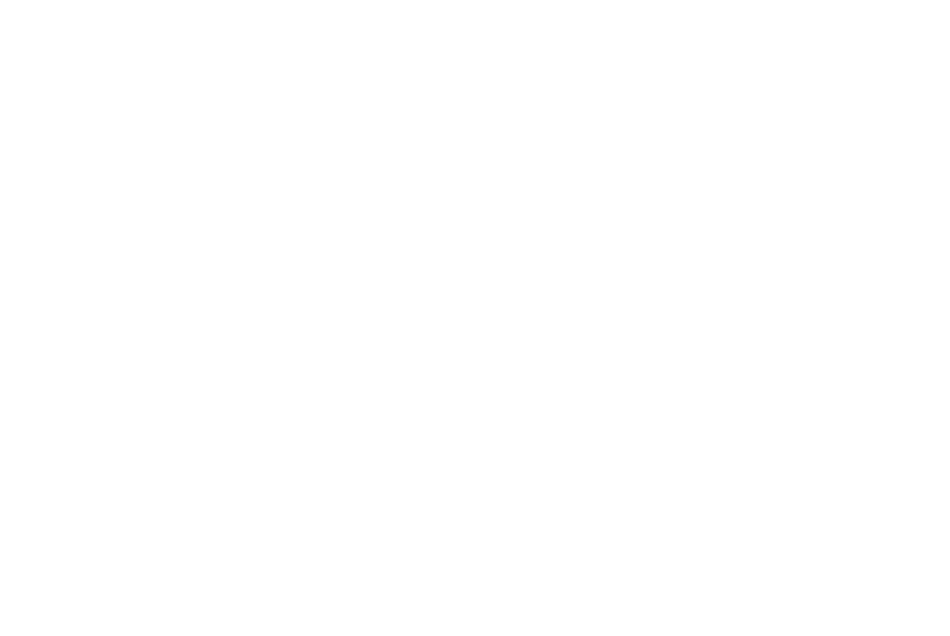

In [126]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()

In [123]:
# Suppose you have a new, unseen house data point stored in a variable called 'new_house'
new_house = [[3, 4.0, 500.0, 'sqrt', 'NaN', 'sqrt', 5000]]  # Replace '...' with the values of the features of the new house

# Convert the new house data into a DataFrame
new_house_df = pd.DataFrame(new_house, columns=['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units', 'zip_code'])

# Perform one-hot encoding for categorical variables in the new house data
new_house_encoded = pd.get_dummies(new_house_df)

# Impute missing values in the new house data
new_house_imputed = imputer.transform(new_house_encoded)

# Make a prediction on the new house
predicted_price = model.predict(new_house_imputed)
print("Predicted Price:", predicted_price)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- lot_size_NaN
- lot_size_units_sqrt
- size_units_sqrt
Feature names seen at fit time, yet now missing:
- lot_size
- lot_size_units_acre
- lot_size_units_sqft
- size_units_sqft
